In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# get csv file from url or you can use your own file path 
# read_csv("/Users/yourusername/yourdirectory/yourfilename")
# As the dataset doesnot contain header we will add the header as names
Iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

In [3]:
# to get an idea about the data
print(Iris.head(10))

   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [4]:
# Exploratory Data Analysis

In [5]:
# to get the summary of our data i.e., basic statisitcs info 
print(Iris.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FBD16F6358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002FBD1896BA8>]], dtype=object)

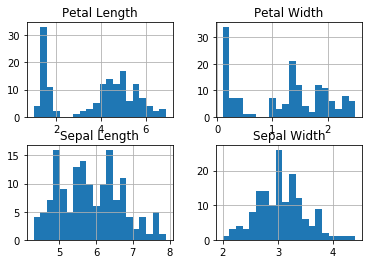

In [6]:
# to plot the histogram
Iris.hist(bins=20)

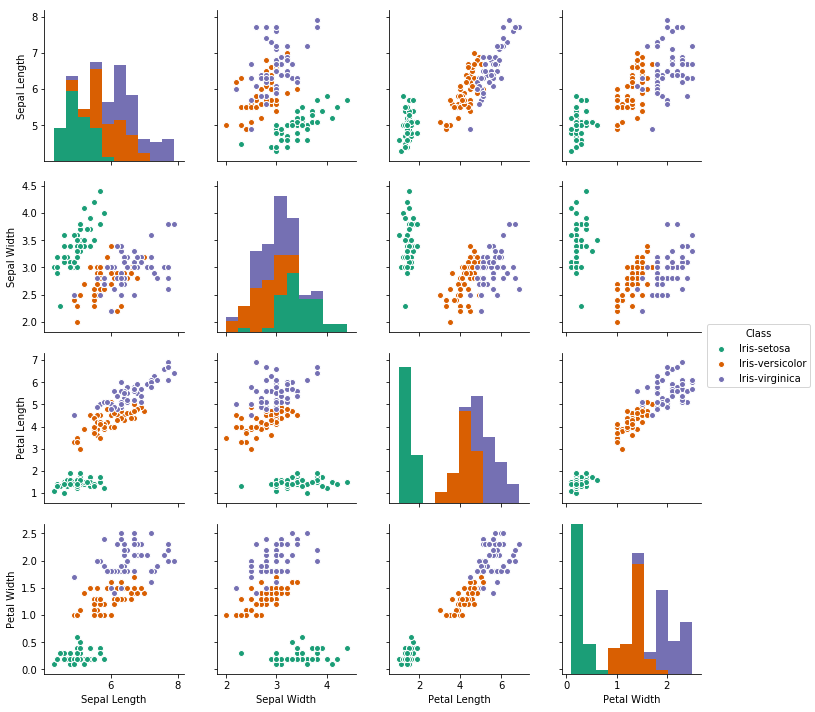

In [7]:
# Create the pairplot of the dataset to find out which flower species is most separable
import seaborn as sns
sns.pairplot(Iris, hue = 'Class', palette = 'Dark2')

In [8]:
# Randomise the data by creating an array
iris_array = Iris.values
np.random.shuffle(iris_array)

In [9]:
# Train Test split. Slit the data into a training set and a test set.
X_train = iris_array[:80][:,0:4]
Y_train = iris_array[:80][:,4]

In [10]:
X_test = iris_array[-20:][:,0:4]
Y_test = iris_array[-20:][:,4]

In [11]:
# Next step is to train a model.
# We will use a Support Vector Machine Classifier.
svc = SVC()
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# Model Evaluation

In [13]:
# Now we get the predictions from the model and create an Accuracy rate,Confusion matrix, Classification report

In [14]:
predictions = svc.predict(X_test)

In [15]:
print("Predicted Results:")
print(predictions)

Predicted Results:
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


In [16]:
print("Actual Results:")
print(Y_test)

Actual Results:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


In [17]:
print("Accuracy rate:  %f" % (accuracy_score(Y_test, predictions)))

Accuracy rate:  0.950000


In [18]:
print(confusion_matrix(Y_test, predictions))

[[ 1  0  0]
 [ 0 10  1]
 [ 0  0  8]]


In [19]:
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         1
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

    avg / total       0.96      0.95      0.95        20



In [20]:
# Wow! the model looks pretty good. 
# We can fine tune our model to get even better results using Grid Search, as in real life the datasets are not usually small.